## 10.1. 데이터 탐색하기

### 10.1.1. 1차원 데이터 탐색하기

In [1]:
from collections import Counter, defaultdict
from functools import partial, reduce
from linear_algebra import shape, get_row, get_column, make_matrix, vector_mean, vector_sum, dot, magnitude, vector_subtract, scalar_multiply
from stats import correlation, standard_deviation, mean
from probability import inverse_normal_cdf
from gradient_descent import maximize_batch
import math, random, csv
import matplotlib.pyplot as plt
import dateutil.parser

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/nani/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape', 'mean', 'random', 'dot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def bucketize(point, bucket_size):
    '''각 데이터를 bucket_size의 배수에 해당하는 구간에 위치시킨다.'''
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    '''구간을 생성하고 각 구간 내 데이터 개수를 계산해 준다.'''
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=''):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [3]:
# -100과 100 사이의 균등분포
uniform = [200 * random.random() - 100 for _ in range(10000)]

# 평균이 0이고 표준편차가 57인 정규분포
normal = [57 * inverse_normal_cdf(random.random())
         for _ in range(10000)]

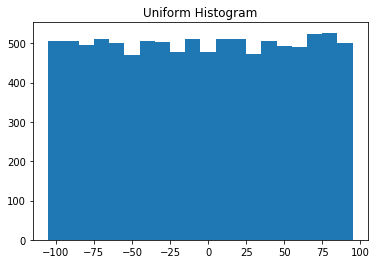

In [4]:
plot_histogram(uniform, 10, 'Uniform Histogram')

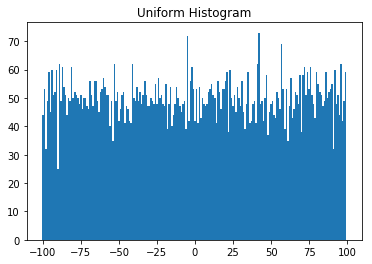

In [5]:
plot_histogram(uniform, 1, 'Uniform Histogram')

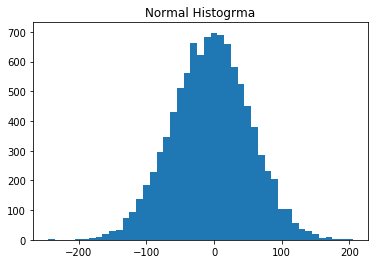

In [6]:
plot_histogram(normal, 10, 'Normal Histogrma')

### 10.1.2. 2차원 데이터

In [7]:
def random_normal():
    '''표준정규분포를 따르는 임의의 데이터를 반환'''
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(10000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

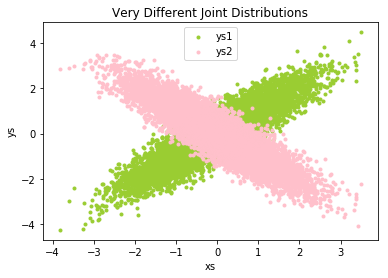

In [8]:
plt.scatter(xs, ys1, marker='.', color='yellowgreen', label='ys1')
plt.scatter(xs, ys2, marker='.', color='pink', label='ys2')

plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title('Very Different Joint Distributions')
plt.show()

In [9]:
print(correlation(xs, ys1))
print(correlation(xs, ys2))

0.8934509462398814
-0.8940989913102254


#### 🌼 legend loc 파라미터 옵션
* (Location) Code - String <br>
>0 - ‘best’ <br>
1 - ‘upper right’ <br>
2 - ‘upper left’ <br>
3 - ‘lower left’ <br>
4 - ‘lower right’ <br>
5 - ‘right’ <br>
6 - ‘center left’ <br>
7 - ‘center right’ <br>
8 - ‘lower center’ <br>
9 - ‘upper center’ <br>
10 - ‘center’

### 10.1.3. 다차원 데이터

In [10]:
def correlation_matrix(data):
    '''(i,j)번째 항목이 i번째 차원과 j번째 차원의 상관관계를 나타내는 num_columns x num_colums 행렬 반환'''
    _, num_columns = shape(data)
    
    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))
    
    return make_matrix(num_columns, num_columns, matrix_entry)

만약 차원의 수가 많지 않다면 산포도 행렬을 이용해서 각 차원의 쌍별로 산포도를 시각화 할 수 있다. <br>
plt.subplts()을 사용하면 차트 내에 하위 차트를 생성할 수 있다. <br>
plt.subplts()에 행과 열을 입력하면 figure 객체(예시에는 사용되지 않는 객체)와 2차원 axes 객체(차트가 그려지는 공간)를 반환해 준다.

In [11]:
num_points = 100

# 데이터 생성
def random_row():
    row = [None, None, None, None]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row
random.seed(0)

data = [random_row()
        for _ in range(num_points)]

print(data)

[[0.12267112731933594, -0.04474639892578125, 1.3805007934570312, 6], [0.11275291442871094, -0.7563209533691406, 1.2276840209960938, 6], [-0.15709877014160156, 2.021503448486328, 10.83871841430664, 6], [-0.2964496612548828, 2.2946739196777344, 2.360668182373047, 6], [0.1714038848876953, 0.5867385864257812, -6.582431793212891, 0], [-1.358652114868164, 4.743995666503906, 8.20821762084961, 6], [0.7659816741943359, -2.7034568786621094, 8.192596435546875, 6], [0.8386135101318359, -4.2897796630859375, 0.418701171875, 6], [-1.1836528778076172, 6.276512145996094, -0.23403167724609375, 6], [1.5952205657958984, -7.921314239501953, -7.403984069824219, 0], [-0.6293582916259766, 3.8996505737304688, 2.719593048095703, 6], [0.1723957061767578, -2.9413986206054688, -1.2726402282714844, 6], [0.2847766876220703, -1.1264419555664062, 7.093524932861328, 6], [0.47280311584472656, -2.7237892150878906, -3.0434417724609375, 0], [0.5176067352294922, -4.140911102294922, -1.4683341979980469, 6], [0.44167518615722

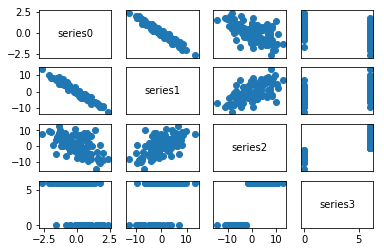

In [12]:
_, num_columns = shape(data)
fig, ax = plt.subplots(num_columns, num_columns)

for i in range(num_columns):
    for j in range(num_columns):
        
        # x축은 j번째 열을, y축은 i번째 행을 나타내는 산포도
        if i != j: 
            ax[i][j].scatter(get_column(data, j), get_column(data, i))
        
        # 만약 i == j, series라는 제목 출력
        else:
            ax[i][j].annotate('series' + str(i), (0.5, 0.5),
                             xycoords='axes fraction', ha='center', va='center')
    
        # 왼쪽과 밑에 위치한 차트에만 축 레이블 명시
        if i < num_columns - 1:
            ax[i][j].xaxis.set_visible(False)
        if j > 0:
            ax[i][j].yaxis.set_visible(False)
    
# 밑에서 가장 오른쪽 그리고 왼쪽에서
# 가장 위에 위치한 차트 안에는 문자열만 있기 때문에
# 축 레이블을 고정
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

산포도 행렬을 살펴보면 series 1은 0과 음의 상관관계를, series 2는 series 1과 양의 상관관계를 보이는 것을 확인할 수 있다.<br>
그리고 series 3은 0과 6, 두 가지 값만 가지는 것을 확인할 수 있다.<br>
그중 0은 series 2의 작은 값들에 대응되며, 6은 series 2의 큰 값들에 대응된다.<br>

## 10.2. 정제하고 합치기
- csv.reader를 치환하는 함수를 만들어서 데이터를 파싱할 때 데이터를 정제하는 것이 안전하다.
- 각 열의 파싱 방법을 명시하고 있는 파서를 list 형태로 함수에 넣어주자. 이때 None은 '이 열은 전처리를 하지 말자'는 의미를 갖는다.

In [13]:
def parse_row(input_row, parsers):
    '''파서 list(None이 포함될 수도 있다)가 주어지면 각 input_row의 항목에 적절한 파서를 적용'''
    return [try_or_none(parser)(value) if parser is not None else value
           for value, parser in zip(input_row, parsers)]

def parse_rows_with(reader, parsers):
    '''각 열에 파서를 적용하기 위해 reader를 치환'''
    for row in reader:
        yield parse_row(row, parsers)

def try_or_none(f):
    '''f가 하나의 입력값을 받는다고 가정하고, 오류가 발생하면 f는 None을 반환해 주는 함수로 치환하자.'''
    def f_or_none(x):
        try:
            return f(x)
        except:
            return None
    return f_or_none

In [14]:
import dateutil.parser
data = []

with open('comma_delimited_stock_prices.csv', 'r', encoding='utf8' ,newline='') as f:
    reader = csv.reader(f)
    for line in parse_rows_with(reader, [dateutil.parser.parse, None, float]):
        data.append(line)
        
for row in data:
    if any(x is None for x in row):
        print(row)

[datetime.datetime(2014, 6, 20, 0, 0), 'AAPL', 90.91]
[datetime.datetime(2014, 6, 20, 0, 0), 'MSFT', 41.68]
[datetime.datetime(3014, 6, 20, 0, 0), 'FB', 64.5]
[datetime.datetime(2014, 6, 19, 0, 0), 'AAPL', 91.86]
[datetime.datetime(2014, 6, 19, 0, 0), 'MSFT', None]
[datetime.datetime(2014, 6, 19, 0, 0), 'FB', 64.34]


- 또한 csv.DictReader에 대해서도 비슷한 헬퍼 함수를 만들 수 있다. <br> 이런 경우에는 다음과 같이 dict형태의 파서 목록과 파서의 이름 필드(field name)을 같이 제공해 줘야 한다.

In [15]:
def try_parse_field(field_name, value, parser_dict):
    '''parse_dict에 포함되어 있는 파서 중에 하나로 파싱'''
    parser = parser_dict.get(field_name)  # 만약 필드 이름이 존재하지 않으면 None을 반환
    if parser is not None:
        return try_or_none(parser)(value)
    else:
        return value
    
def parse_dict(input_dict, parser_dict):
    return { field_name : try_parse_field(field_name, value, parser_dict)
           for field_name, value in input_dict.items() }

## 10.3. 데이터 처리

In [16]:
with open('stocks.txt', 'r', encoding='utf8', newline='') as f:
    reader = csv.DictReader(f, delimiter='\t')
    
    data= [parse_dict(row, {'data' : dateutil.parser.parse, 'closing_price' : float})
           for row in reader]

1. 살펴볼 데이터를 AAPL에 대한 행으로 한정한다.
2. 각 행에서 closing_price를 갖고 온다.
3. closing_price의 max를 찾는다.

>이 모든 것을 list comprehension으로 처리할 수 있다.

In [17]:
max_aapl_price = max(row['closing_price']
                    for row in data
                    if row['symbol'] == 'AAPL')
max_aapl_price

119.0

1. symbol이 동일한 모든 행을 하나의 그룹으로 모은다.
2. 위와 동일한 과정으로 각 그룹의 최고치를 찾는다.

In [18]:
# symbol을 기준으로 행을 그룹화
by_symbol = defaultdict(list)

for row in data:
    by_symbol[row['symbol']].append(row)

# lis comprehension으로 각 그룹의 최고치 계산
max_price_by_symbol = { symbol : max(row['closing_price']
                                    for row in grouped_rows)
                      for symbol, grouped_rows in by_symbol.items()}

max_price_by_symbol

{'AAPL': 119.0, 'MSFT': 49.3, 'FB': 81.45}

In [19]:
def picker(field_name):
    '''dict의 특정 필드를 선택해주는 함수를 반환'''
    return lambda row: row[field_name]

def pluck(field_name, rows):
    '''dict list를 필드 리스트로 변환'''
    return map(picker(field_name), rows)

In [20]:
def group_by(grouper, rows, value_transform=None):
    # key는 grouper의 결과값이며 value는 각 그룹에 속하는 모든 행의 list
    grouped = defaultdict(list)
    for row in rows:
        grouped[grouper(row)].append(row)
    if value_transform is None:
        return grouped
    else:
        return { key : value_transform(rows)
               for key, rows in grouped.items() }

In [21]:
max_price_by_symbol = group_by(picker('symbol'), 
                               data, 
                               lambda rows: max(pluck('closing_price', rows)))
max_price_by_symbol

{'AAPL': 119.0, 'MSFT': 49.3, 'FB': 81.45}

1. 주가를 날짜 기준으로 정렬
2. zip을 사용해서 주가를 (전일, 당일) 쌍으로 변환
3. 각 쌍을 사용해서 새로운 '변화율'행 생성

In [22]:
def percent_price_change(yesterday, today):
    return today['closing_price'] / yesterday['closing_price'] - 1

def day_over_day_changes(grouped_rows):
    # 행을 날짜 기준으로 정렬
    ordered = sorted(grouped_rows, key=picker('date'))
    
    # (전일, 당일) 쌍을 생성하기 위해
    # 당일을 포함하는 list와 당일을 포함하지 않는 list에 대해 zip
    return [{'symbol' : today['symbol'],
            'date' : today['date'],
            'change' : percent_price_change(yesterday, today)}
           for yesterday, today in zip(ordered, ordered[1:])]

In [23]:
# 그리고 이 함수를 group_by 함수의 value_transform으로 사용할 수 있다.
# key는 symbol이고, value는 모든 day_over_day_changes dict의 lisy
changes_by_symbol = group_by(picker('symbol'), data, day_over_day_changes)

# 모든 day_over_day_changes dicts를 하나의 list로 변환
all_changes = [change
              for changes in changes_by_symbol.values()
              for change in changes]

In [24]:
max(all_changes, key=picker('change'))

{'symbol': 'AAPL', 'date': '1997-08-06', 'change': 0.3283582089552237}

In [25]:
min(all_changes, key=picker('change'))

{'symbol': 'AAPL', 'date': '2000-09-29', 'change': -0.5193370165745856}

In [26]:
def combine_pct_changes(pct_change1, pct_change2):
    return (1 + pct_change1) * (1 + pct_change2) - 1

In [27]:
def overall_change(changes):
    return reduce(combine_pct_changes, pluck("change", changes))

overall_change_by_month = group_by(lambda row : row['date'].month, all_changes, overall_change)

overall_change_by_month

AttributeError: 'str' object has no attribute 'month'

* 🌸__Lambda__  
Lambda expressions (sometimes called lambda forms) are used to create anonymous functions. The expression lambda parameters: expression yields a function object. The unnamed object behaves like a function object defined with:  

    간단히 얘기하면 이름을 정의하지 않는(anonymous) 함수 표현 방법이다. 즉, 마치 일회용품처럼 간단히 이용할 목적으로 사용되는 표현 방식 정도로 이해하면 된다.
    
    <code>def to_double(x): return x\*2</code>  
    <code>to_double = lambda x : x\*2</code>  
    
* 🌸__map__  
Apply function to every item of iterable and return a list of the results. If additional iterable arguments are passed, function must take that many arguments and is applied to the items from all iterables in parallel. If one iterable is shorter than another it is assumed to be extended with None items. If function is None, the identity function is assumed; if there are multiple arguments, map() returns a list consisting of tuples containing the corresponding items from all iterables (a kind of transpose operation). The iterable arguments may be a sequence or any iterable object; the result is always a list.  

    map()함수는 built-in 함수로 list나 dictionary와 같은 iterable한 데이터를 인자로 받아 list 안의 개별 item을 함수의 인자로 전달하여 결과를 list 형태로 반환해주는 함수이다.

    <code>def func(x): return x\*2</code>  
    <code>map(func, [1,2,3,4])</code>  
    <code>🌼result : [2,4,6,8]</code>  
    
    보통 인자를 list 형태로 전달하는게 일반적이지만 iterable한 형태인 dictionary 같은 인자도 가능하다.
    
    <code>x = {1:10, 2:20, 3:30}</code>  
    <code>map(func, x)</code>  
    <code>🌼result : [2,4,6]</code>  
    
    dictionary의 key값이 전달되게 되지만, 아래와 같이 조금만 응용하면 value값을 전달하는 것도 가능하다.  
    <code>x = {1:10, 2:20, 3:30}</code>  
    <code>map(func, [x[i] for i in x])</code>  
    <code>🌼result : [20,40,60]</code>  
    

## 10.4. 척도 조절

사람|키(인치)|키(cm)|몸무게(파운드)
:-----:|:-----:|:-----:|:-----:
A|63|160.0|150
B|67|170.2|160
C|70|177.8|171

In [28]:
def scale(data_matrix):
    '''각 열의 평균과 표준편차를 반환'''
    num_rows, num_cols = shape(data_matrix)
    means = [mean(get_column(data_matrix, j))
            for j in range(num_cols)]
    stdevs = [standard_deviation(get_column(data_matrix, j))
             for j in range(num_cols)]
    return means, stdevs

In [29]:
def rescale(data_matrix):
    '''각 열의 평균을 0, 표준편차를 1로 변환하면서 입력되는 데이터의 척도를 조절
    편차가 없는 열은 그대로 유지'''
    means, stdevs = scale(data_matrix)
    
    def rescaled(i, j):
        if stdevs[j] > 0:
            return (data_matrix[i][j] - means[j]) / stdevs[j]
        else:
            return data_matrix[i][j]
    
    num_rows, num_cols = shape(data_matrix)
    return make_matrix(num_rows, num_cols, rescaled)

In [30]:
print('rescaling')
data = [[1, 20, 2], [1, 30, 3], [1, 40, 4]]

print('original: ', data)
print('scale: ', scale(data))
print('rescaled: ', rescale(data))

rescaling
original:  [[1, 20, 2], [1, 30, 3], [1, 40, 4]]
scale:  ([1.0, 30.0, 3.0], [0.0, 10.0, 1.0])
rescaled:  [[1, -1.0, -1.0], [1, 0.0, 0.0], [1, 1.0, 1.0]]


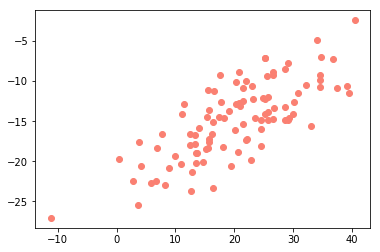

In [31]:
X = [
    [20.9666776351559,-13.1138080189357],
    [22.7719907680008,-19.8890894944696],
    [25.6687103160153,-11.9956004517219],
    [18.0019794950564,-18.1989191165133],
    [21.3967402102156,-10.8893126308196],
    [0.443696899177716,-19.7221132386308],
    [29.9198322142127,-14.0958668502427],
    [19.0805843080126,-13.7888747608312],
    [16.4685063521314,-11.2612927034291],
    [21.4597664701884,-12.4740034586705],
    [3.87655283720532,-17.575162461771],
    [34.5713920556787,-10.705185165378],
    [13.3732115747722,-16.7270274494424],
    [20.7281704141919,-8.81165591556553],
    [24.839851437942,-12.1240962157419],
    [20.3019544741252,-12.8725060780898],
    [21.9021426929599,-17.3225432396452],
    [23.2285885715486,-12.2676568419045],
    [28.5749111681851,-13.2616470619453],
    [29.2957424128701,-14.6299928678996],
    [15.2495527798625,-18.4649714274207],
    [26.5567257400476,-9.19794350561966],
    [30.1934232346361,-12.6272709845971],
    [36.8267446011057,-7.25409849336718],
    [32.157416823084,-10.4729534347553],
    [5.85964365291694,-22.6573731626132],
    [25.7426190674693,-14.8055803854566],
    [16.237602636139,-16.5920595763719],
    [14.7408608850568,-20.0537715298403],
    [6.85907008242544,-18.3965586884781],
    [26.5918329233128,-8.92664811750842],
    [-11.2216019958228,-27.0519081982856],
    [8.93593745011035,-20.8261235122575],
    [24.4481258671796,-18.0324012215159],
    [2.82048515404903,-22.4208457598703],
    [30.8803004755948,-11.455358009593],
    [15.4586738236098,-11.1242825084309],
    [28.5332537090494,-14.7898744423126],
    [40.4830293441052,-2.41946428697183],
    [15.7563759125684,-13.5771266003795],
    [19.3635588851727,-20.6224770470434],
    [13.4212840786467,-19.0238227375766],
    [7.77570680426702,-16.6385739839089],
    [21.4865983854408,-15.290799330002],
    [12.6392705930724,-23.6433305964301],
    [12.4746151388128,-17.9720169566614],
    [23.4572410437998,-14.602080545086],
    [13.6878189833565,-18.9687408182414],
    [15.4077465943441,-14.5352487124086],
    [20.3356581548895,-10.0883159703702],
    [20.7093833689359,-12.6939091236766],
    [11.1032293684441,-14.1383848928755],
    [17.5048321498308,-9.2338593361801],
    [16.3303688220188,-15.1054735529158],
    [26.6929062710726,-13.306030567991],
    [34.4985678099711,-9.86199941278607],
    [39.1374291499406,-10.5621430853401],
    [21.9088956482146,-9.95198845621849],
    [22.2367457578087,-17.2200123442707],
    [10.0032784145577,-19.3557700653426],
    [14.045833906665,-15.871937521131],
    [15.5640911917607,-18.3396956121887],
    [24.4771926581586,-14.8715313479137],
    [26.533415556629,-14.693883922494],
    [12.8722580202544,-21.2750596021509],
    [24.4768291376862,-15.9592080959207],
    [18.2230748567433,-14.6541444069985],
    [4.1902148367447,-20.6144032528762],
    [12.4332594022086,-16.6079789231489],
    [20.5483758651873,-18.8512560786321],
    [17.8180560451358,-12.5451990696752],
    [11.0071081078049,-20.3938092335862],
    [8.30560561422449,-22.9503944138682],
    [33.9857852657284,-4.8371294974382],
    [17.4376502239652,-14.5095976075022],
    [29.0379635148943,-14.8461553663227],
    [29.1344666599319,-7.70862921632672],
    [32.9730697624544,-15.5839178785654],
    [13.4211493998212,-20.150199857584],
    [11.380538260355,-12.8619410359766],
    [28.672631499186,-8.51866271785711],
    [16.4296061111902,-23.3326051279759],
    [25.7168371582585,-13.8899296143829],
    [13.3185154732595,-17.8959160024249],
    [3.60832478605376,-25.4023343597712],
    [39.5445949652652,-11.466377647931],
    [25.1693484426101,-12.2752652925707],
    [25.2884257196471,-7.06710309184533],
    [6.77665715793125,-22.3947299635571],
    [20.1844223778907,-16.0427471125407],
    [25.5506805272535,-9.33856532270204],
    [25.1495682602477,-7.17350567090738],
    [15.6978431006492,-17.5979197162642],
    [37.42780451491,-10.843637288504],
    [22.974620174842,-10.6171162611686],
    [34.6327117468934,-9.26182440487384],
    [34.7042513789061,-6.9630753351114],
    [15.6563953929008,-17.2196961218915],
    [25.2049825789225,-14.1592086208169]
]
np_X= np.array(X)
plt.plot(np_X[:,0], np_X[:,1], 'ro', color='salmon')
plt.show()

In [32]:
def de_mean_matrix(A):
    '''A의 모든 값에서 각 열의 평균을 빼준 행렬을 반환
    반환된 행렬의 모든 열의 평균은 0'''
    nr, nc = shape(A)
    column_means, _ = scale(A)
    return make_matrix(nr, nc, lambda i, j: A[i][j] - column_means[j])

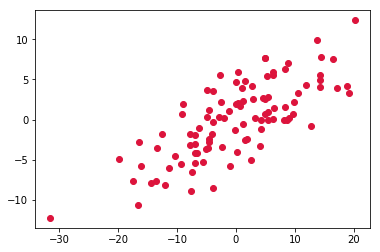

In [39]:
np_mean_X = np.array(de_mean_matrix(X))

plt.plot(np_mean_X[:,0], np_mean_X[:,1], 'ro', color='crimson')
plt.show()

In [34]:
def direction(w):
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

def directional_variance_i(x_i, w):
    '''w가 나타내는 방향에서 x_i행의 편차를 반환'''
    return dot(x_i, direction(w)) ** 2

def directional_variance(X, w):
    '''w가 나타내는 방향에서 데이터 전체의 편차를 반환'''
    return sum(directional_variance_i(x_i, w) 
               for x_i in X)

def directional_variance_gradient_i(x_i, w):
    '''방향의 경사(w의 기울기)에 x_i행이 기여하는 부분'''
    projection_length = dot(x_i, direction(w))
    return [2 * projection_length * x_ij for x_ij in x_i]

def directional_variance_gradient(X, w):
    return vector_sum(directional_variance_gradient_i(x_i,w) 
                      for x_i in X)

def first_principal_component(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maximize_batch(
        partial(directional_variance, X),           # is now a function of w
        partial(directional_variance_gradient, X),  # is now a function of w
        guess)
    return direction(unscaled_maximizer)

# 여기서는 'y'에 해당하는 값이 없기 때문에, 'y'를 'None'으로 구성된 벡터로 대체하고 
# 이 벡터를 무시하는 함수를 사용한다.
def first_principal_component_sgd(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maximize_stochastic(
        lambda x, _, w: directional_variance_i(x, w),
        lambda x, _, w: directional_variance_gradient_i(x, w),
        X, [None for _ in X], guess)
    return direction(unscaled_maximizer)

In [41]:
def project(v, w):
    '''v를 w방향으로 투영'''
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

def remove_projection_from_vector(v, w):
    '''v에서 v를 w로 투영시킨 결과를 빼줌'''
    return vector_subtract(v, project(v, w))

def remove_projection(X, w):
    '''X의 각 행을 w로 투영시키고 각 행에서 투영시킨 값을 뺴줌'''
    return [remove_projection_from_vector(x_i, w) for x_i in X]

def principal_component_analysis(X, num_components):
    components = []
    for _ in range(num_components):
        component = first_principal_component(X)
        components.append(component)
        X = remove_projection(X, component)

    return components

def transform_vector(v, components):
    return [dot(v, w) for w in components]

def transform(X, components):
    return [transform_vector(x_i, components) for x_i in X]

In [42]:
print("PCA")

Y = de_mean_matrix(X)
components = principal_component_analysis(Y, 2)
print("principal components", components)
print("first point", Y[0])
print("first point transformed", transform_vector(Y[0], components))

PCA


/Users/nani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  if sys.path[0] == '':


principal components [[0.9238554090431899, 0.3827416663777809], [-0.38272245395799814, 0.9238633682728026]]
first point [0.6663708720254569, 1.686941849912941]
first point transformed [1.2612932692676408, 1.3034686841532084]


## 10.6. 더 공부해 보고 싶다면
- pandas는 아마 파이썬으로 데이터를 정제하고, 합치고, 처리하는 데 가장 효과적인 도구 일 것이다.<br> ⟪파이썬 라이브러리를 활용한 데이터 분석⟫(한빛미디어, 2013)
- scikit-learn은 PCA 등 다양한 방식의 행렬 분해 함수를 제공해 준다.